In [29]:
import pandas as pd
import seaborn as sns

In [2]:
# Read in by-country file
df = pd.read_csv("../data/all-weeks-countries.tsv", sep='\t')

In [21]:
# Top line descriptive stats
unique_values = df.nunique()
by_type = df.groupby('category').nunique()
print(f"""
Countries: {unique_values.country_name}
Weeks: {unique_values.week}
Items: {unique_values.show_title}
    {round(by_type.iloc[0].show_title / unique_values.show_title * 100, 1)}% movies
    {round(by_type.iloc[1].show_title / unique_values.show_title * 100, 1)}% TV shows
""")


Countries: 94
Weeks: 36
Items: 2355
    76.0% movies
    24.4% TV shows



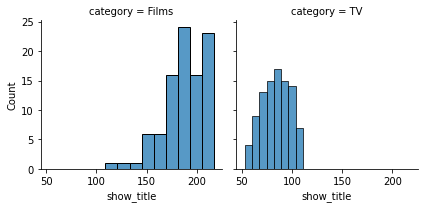

In [33]:
# Distribution of item count by country
items_by_country = df.groupby(['country_name', 'category']).nunique().show_title.reset_index()
g = sns.FacetGrid(items_by_country, col='category')
g.map(sns.histplot, 'show_title')

<AxesSubplot:>

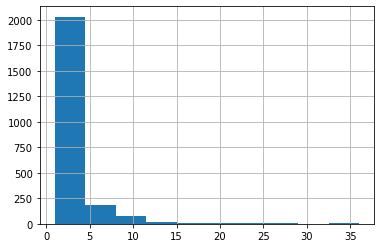

In [37]:
# Cumulative week distribution across countries
df.groupby('show_title').cumulative_weeks_in_top_10.max().hist()

In [41]:
# Any variation in staying power by item type/country? (mean cumulative weeks)
weeks_by_country_item = df.groupby(['country_name', 'show_title']).cumulative_weeks_in_top_10.max().reset_index()
weeks_by_country_item.set_index('show_title').join(df[['show_title', 'category']].drop_duplicates().set_index('show_title'))

,country_name,cumulative_weeks_in_top_10,category
show_title,,,
'76,Nigeria,2,Films
10 Cloverfield Lane,France,1,Films
10 Cloverfield Lane,Réunion,1,Films
10 Cloverfield Lane,South Korea,1,Films
1000 Miles from Christmas,Cyprus,2,Films
...,...,...,...
حكايات بنات الجزء ١,Egypt,4,TV
راس السنة,Egypt,4,Films
صاحب المقام,Egypt,5,Films


In [22]:

#   Variation by country
# Item overlap across countries
# Recreate descriptive analyses from earlier document


,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-03-06,Films,1,Chernobyl 1986,NaN,2
1,Argentina,AR,2022-03-06,Films,2,The Weekend Away,NaN,1
2,Argentina,AR,2022-03-06,Films,3,Against The Ice,NaN,1
3,Argentina,AR,2022-03-06,Films,4,Restless,NaN,2
4,Argentina,AR,2022-03-06,Films,5,Spider-Man: Into the Spider-Verse,NaN,1
...,...,...,...,...,...,...,...,...
67655,Vietnam,VN,2021-07-04,TV,6,Reply 1988,Reply 1988: Season 1,1
67656,Vietnam,VN,2021-07-04,TV,7,"Nevertheless,","Nevertheless,: Season 1",1
67657,Vietnam,VN,2021-07-04,TV,8,Too Hot to Handle,Too Hot to Handle: Season 2,1
67658,Vietnam,VN,2021-07-04,TV,9,Record of Ragnarok,Record of Ragnarok: Season 1,1
